In [1]:
# import the modules
import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as nplot

In [2]:
# change to working dir
data_dir ='/Users/wang/Desktop/Research_projects/BBSC/Functional/Parcellation/correlation'
os.chdir(data_dir)

In [3]:
#--------- extract the data
mat_data_sub1 = scipy.io.loadmat('sub1_correlation_indi.mat')
mat_data_sub2 = scipy.io.loadmat('sub2_correlation_indi.mat')

session_inter_sub1 = mat_data_sub1['inter_session_corr_sub1'] # session * session * networks
session_avg_sub1 = mat_data_sub1['session_avg_corr_sub1'] # session * networks

session_inter_sub2 = mat_data_sub2['inter_session_corr_sub2'] # session * session * networks
session_avg_sub2 = mat_data_sub2['session_avg_corr_sub2'] # session * networks

session2delete_sub1 = [10,13] # session 11 and 14 were deleted because sleep for sub1
session2delete_sub2 = [9,11,12,13,14,19,21,22,27,29,34,37] # sessions 10,12-15,20,22,23,28,30,35,38 were deleted for sub2

session_inter_sub1 = np.delete(session_inter_sub1, session2delete_sub1, axis =0) 
session_inter_sub1 = np.delete(session_inter_sub1, session2delete_sub1, axis =1) 
session_avg_sub1 = np.delete(session_avg_sub1, session2delete_sub1,axis = 0) 

session_inter_sub2 = np.delete(session_inter_sub2, session2delete_sub2, axis =0) 
session_inter_sub2 = np.delete(session_inter_sub2, session2delete_sub2, axis =1) 
session_avg_sub2 = np.delete(session_avg_sub2, session2delete_sub2,axis = 0)

In [4]:
# plot the inter session variablity for different networks in sub1

labels_sub1 = np.arange(1, 38+1).tolist() # for sub1
labels_sub1 = np.delete(labels_sub1, session2delete_sub1) 

from nilearn import plotting as nplot
for neti in range(session_inter_sub1.shape[2]):
    
    correlation_matrix = np.squeeze (session_inter_sub1[:,:,neti])
    
    np.fill_diagonal(correlation_matrix, 0)
    nplot.plot_matrix(correlation_matrix, figure=(5, 5), labels = labels_sub1,
                     vmax=0.4, vmin=-0.4, title=None,
                     reorder=False)
    plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/sub1/indiv/' \
                + f'Network_{neti+1}_pub_parc.tiff', dpi=300)
    plt.close()
plt.show()

In [5]:
# plot the inter session variablity for different networks in sub2

labels_sub2 = np.arange(1, 40+1).tolist()   # for sub2
labels_sub2 = np.delete(labels_sub2, session2delete_sub2) 

from nilearn import plotting as nplot
for neti in range(session_inter_sub2.shape[2]):
    
    correlation_matrix = np.squeeze (session_inter_sub2[:,:,neti])
    
    np.fill_diagonal(correlation_matrix, 0)
    nplot.plot_matrix(correlation_matrix, figure=(5, 5), labels = labels_sub2,
                     vmax=0.4, vmin=-0.4, title=None,
                     reorder=False)
    
    plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/sub2/indiv/' \
                + f'Network_{neti+1}_pub_parc.tiff', dpi=300)
    plt.close()
plt.show()

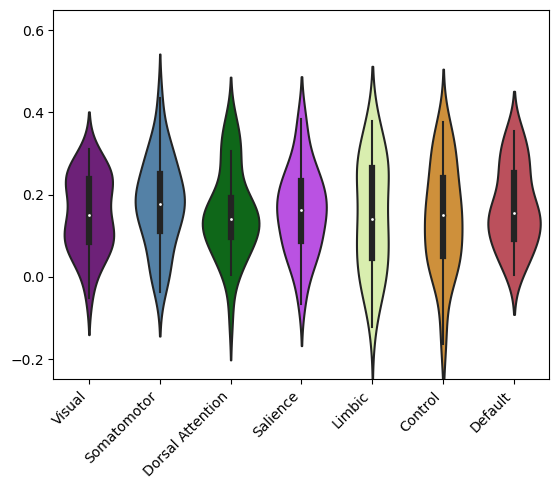

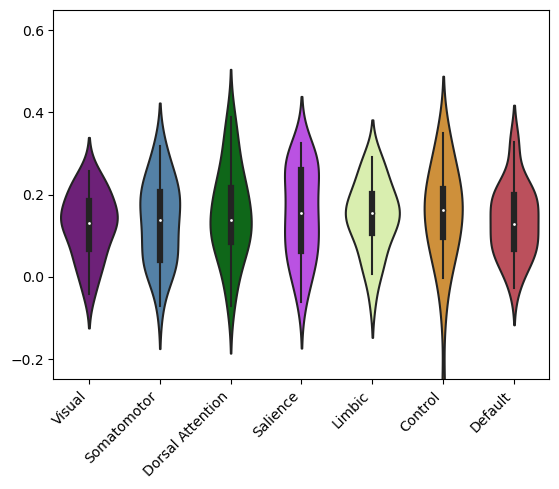

In [6]:

corr_map_sub1 = pd.DataFrame(session_avg_sub1, columns=['Visual', 'Somatomotor', 'Dorsal Attention',
                                        'Salience', 'Limbic','Control','Default'])
corr_map_sub2 = pd.DataFrame(session_avg_sub2, columns=['Visual', 'Somatomotor', 'Dorsal Attention',
                                        'Salience', 'Limbic','Control','Default'])

network_colors = {
    'Visual': (120, 18, 134),
    'Somatomotor': (70, 130, 180),
    'Dorsal Attention': (0, 118, 14),
    'Salience': (196, 58, 250),
    'Limbic': (220, 248, 164),
    'Control': (230, 148, 34),
    'Default': (205, 62, 78),
}

# Assuming corr_map is your data for the violin plot

# Convert RGB values to normalized [0, 1] range
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in network_colors.values()]

#plt.figure(figsize=(7, 7))
network_plots = sns.violinplot(corr_map_sub1, palette=normalized_colors)
network_plots.set_xticklabels(network_plots.get_xticklabels(), rotation=45, ha='right')
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6])
plt.ylim(-0.25, 0.65)

plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/sub1/indiv/Network_avg_corr.tiff', dpi=300)
plt.show()

#plt.figure(figsize=(3, 3))
network_plots = sns.violinplot(corr_map_sub2, palette=normalized_colors)
network_plots.set_xticklabels(network_plots.get_xticklabels(), rotation=45, ha='right')
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6])
plt.ylim(-0.25, 0.65)

plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/sub2/indiv/Network_avg_corr.tiff', dpi=300)
plt.show()

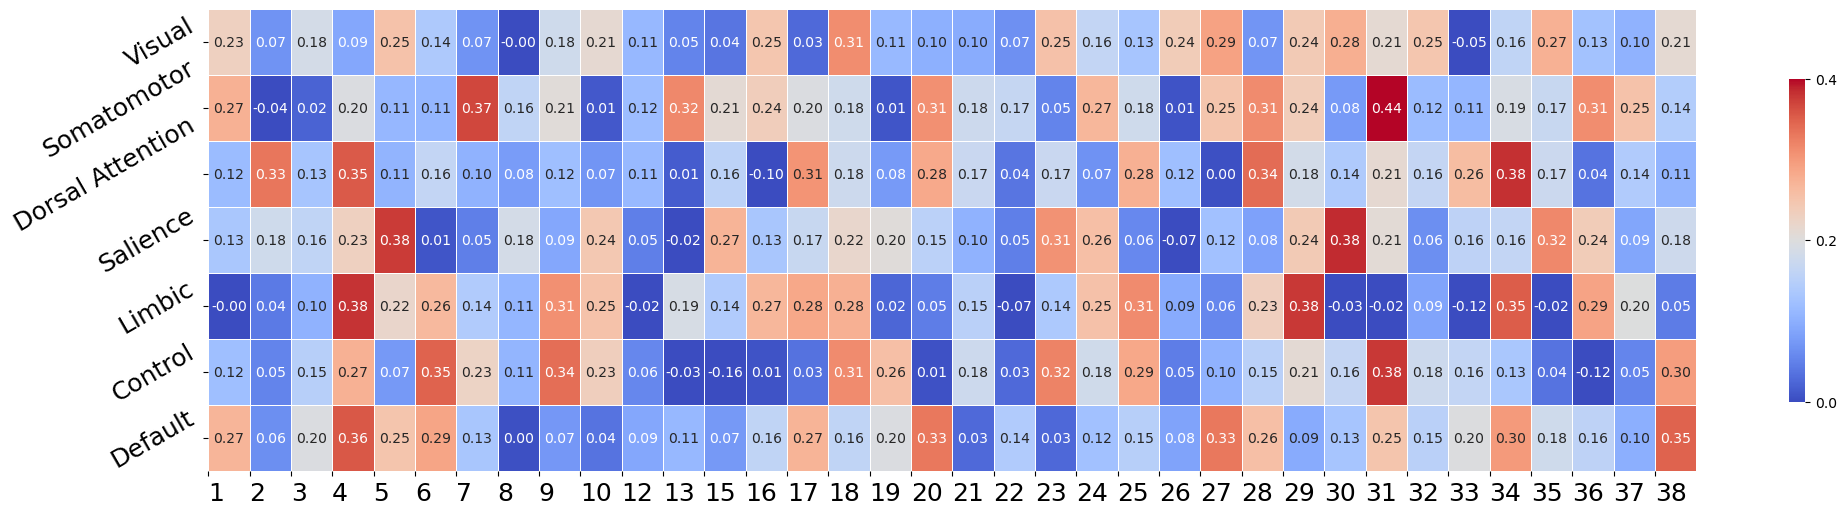

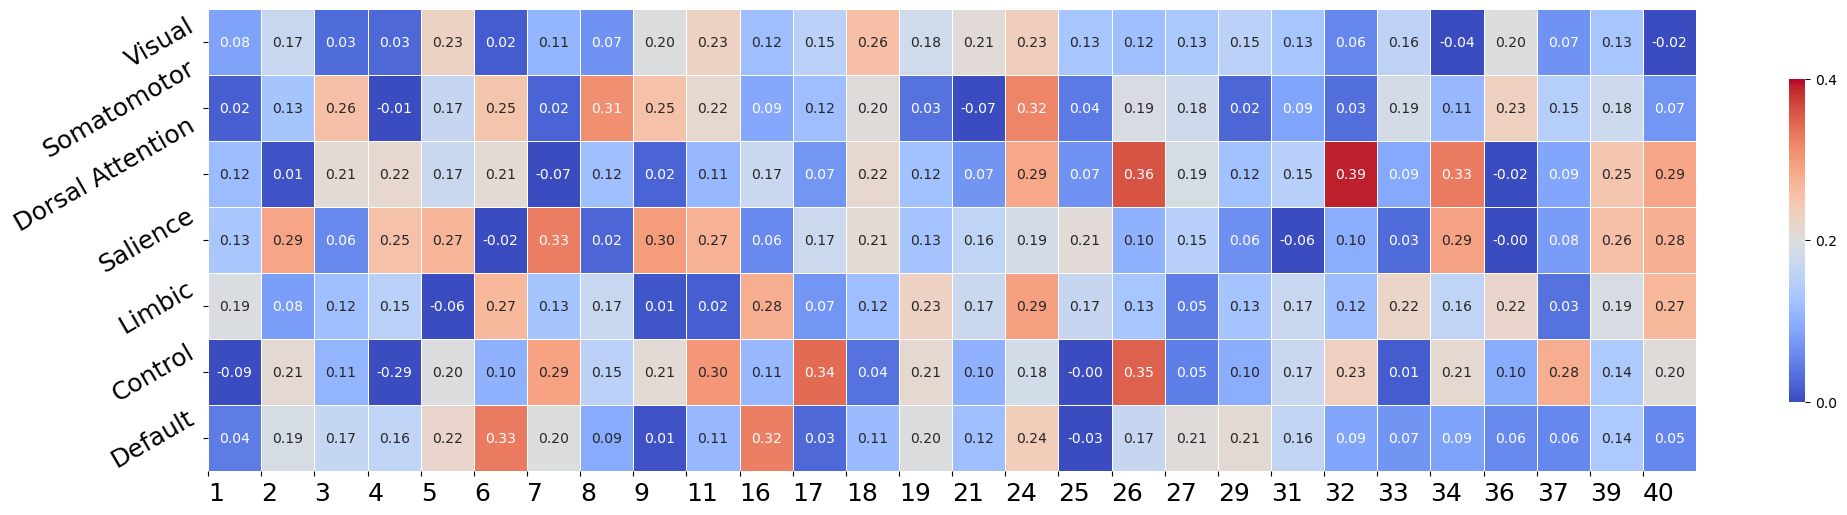

In [7]:

ticks_sub1 = np.arange(1, 38+1).tolist() # for sub1
ticks_sub2 = np.arange(1, 40+1).tolist()   # for sub2

ticks_sub1 = np.delete(ticks_sub1, session2delete_sub1) 
ticks_sub2 = np.delete(ticks_sub2, session2delete_sub2) 

# Transpose the DataFrame to exchange the x and y axes
corr_map_transposed_sub1 = corr_map_sub1.T
corr_map_transposed_sub2 = corr_map_sub2.T
#cmap_reversed = plt.cm.get_cmap('RdBu').reversed()

# Create a heatmap with colors
plt.figure(figsize=(24, 6))
sns.heatmap(corr_map_transposed_sub1, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, \
            vmin = 0, vmax=0.4, annot_kws={"size": 10}, \
            cbar_kws={"shrink": 0.7, "ticks": [0, 0.2, 0.4]})
#plt.title('Correlation Heatmap', fontsize=16)
# plt.xlabel('Brain Regions', fontsize=14)
# plt.ylabel('Brain Regions', fontsize=14)
plt.xticks(np.arange(len(ticks_sub1)), ticks_sub1, rotation=0, ha='left', fontsize=18)  # Keep x-axis labels horizontal
plt.yticks(rotation=30, ha='right', fontsize=18) 
plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/sub1/indiv/Network_corr.tiff', dpi=300)
plt.show()


# Create a heatmap with colors
plt.figure(figsize=(24, 6))
sns.heatmap(corr_map_transposed_sub2, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, \
            vmin = 0, vmax=0.4, annot_kws={"size": 10}, \
            cbar_kws={"shrink": 0.7, "ticks": [0, 0.2, 0.4]})
#plt.title('Correlation Heatmap', fontsize=16)
# plt.xlabel('Brain Regions', fontsize=14)
# plt.ylabel('Brain Regions', fontsize=14)
plt.xticks(np.arange(len(ticks_sub2)), ticks_sub2, rotation=0, ha='left', fontsize=18)  # Keep x-axis labels horizontal
plt.yticks(rotation=30, ha='right', fontsize=18) 
plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/sub2/indiv/Network_corr.tiff', dpi=300)
plt.show()